# Field methods in remote sensing: Modelling leaf spectra

- **Prerequisites:** None.


## Background

Quantitative remote sensing is the process of developing models that relate measured biophysical variables to the pixel values in an image. For example, after going to the field and working in the lab you now have a range of measured variables of individual trees that tell you a lot about the potential of the trees to catch fire. We call this 'Flammability', and flammability is driven by the water content in the leaves, and the leaf mass. The normalized difference water index (`NDWI`) is used to monitor changes in water content of vegetation (Gao, 1996), therefore it might be useful to monitor the flammability of eucalyptus trees. 

Over the past few days you measured the water content and the mass of many leaves, and you used these biophysical variables to quantify the Fuel Moisture Content (FMC) of eucalyptus trees in two plots in the National Arboretum Canberra. However we are interested in estimating the FMC of eucalyptus trees in the Canberra region not just in the Arboretum.

To estimate the FMC of eucalyptus trees in the Canberra region, we need to create a model that relates the measured FMC, and a larger dataset like a Sentinel 2 image.


## Aims of the practical session

The aim of this session is to: 
- determine how different biophysical variables change the reflectance of the leaves (using simulated spectra),

## Description

To achieve the aims above, 

First we will:
- Use the simulated leaf spectra to describe how each biochemical component changes the leaf spectra,


For this activity, we will use spectra simulated using PROSPECT-D which is a software program that simulates directional–hemispherical reflectance and transmittance from live and senesced leaves over the 400 nm to 2500 nm range of the electromagnetic spectrum (Jacquemoud & Baret, 1990, Fourty et al., 1996, Jacquemoud et al., 1996 and Jacquemoud et al., 2000). ). 

The absorption of light by photosynthetic pigments which predominates in the visible (VIS) spectrum was long assumed to be entirely caused by chlorophylls, although carotenoids and anthocyanins may also be significant. The absorption of light by water and the leaf structural components (e.g. cellulose and lignin) affects the near infrared (NIR) and short-wave infrared (SWIR) regions of the spectrum. 

you'll look at them in turn.

Let's do it!
***

## Modelling leaf spectra

For this section I've used PROSPECT-D to simulate the reflectance of leaves with different biochemical concentrations. I used the `prosail` python package (https://github.com/jgomezdans/prosail).

The parameters used in the models and their units are shown below:

|Parameter|Description of parameter|Units|min| max|
| --- | --- | --- | --- | --- |
|N 	|Leaf structure parameter| 	N/A| 	0.8| 	2.5|
|cab 	|Chlorophyll a+b concentration| 	ug/cm2| 	0| 	80|
|caw 	|Equivalent water thickiness| 	cm| 	0.001| 	0.05|
|car 	|Carotenoid concentration| 	ug/cm2| 	0.01| 	21|
|cm 	|Dry matter content| 	g/cm2| 	0.001| 0.05 |

Some useful equations to remember are shown below. I used these equations to calculate `FMC` from the simulated data, and you will have to use them later on.

1. Equivalent water thickness (EWT):
$$EWT=\frac{Weight_{(fresh)} - Weight_{(dry)}}{Leaf surface area}$$



2. Dry Matter Content (DMC):
$$DMC=\frac{Weight_{(dry)}}{Leaf surface area}$$



3. Fuel Moisture Content (FMC):
$$FMC = \frac{Weight_{(fresh)} - Weight_{(dry)}}{Weight_{(dry)}} * 100$$



$$FMC = \frac{EWT}{DMC}$$


## Load packages
Import Python packages that are used for the analysis.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

## Load the data

Here, we'll load the simulated data into a dataframe and plot it; then you will have to answer a couple of questions.

You will use the following files:

`prospectSimulatedSpectra_Cab.csv` - leaf reflectance using different Chlorophyll a and Chlorophyll b concentrations.

`prospectSimulatedSpectra_Car.csv` - leaf reflectance using different Carotenoid concentrations

`prospectSimulatedSpectra_DMC.csv` - leaf reflectance using different Dry Matter Content (DMC) values

`prospectSimulatedSpectra_EWT.csv` - leaf reflectance using different Equivalent Water Thickness (EWT) values

`prospectSimulatedSpectra_FMC.csv` - leaf reflectance using different Fuel Moisture Content (EWT) calculated using the DMC and EWT.

In [2]:
# Change the folder path to whereever you saved the spectra from PROSPECT
folder = 'simulated/' 
df_cab = pd.read_csv(folder+'prospectSimulatedSpectra_Cab.csv')
df_cab

,Wavelength,Chloro_0,Chloro_1,Chloro_2,Chloro_3,Chloro_4,Chloro_5,Chloro_6,Chloro_7,Chloro_8,...,Chloro_71,Chloro_72,Chloro_73,Chloro_74,Chloro_75,Chloro_76,Chloro_77,Chloro_78,Chloro_79,Chloro_80
0,400,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,...,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078
1,401,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,...,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078
2,402,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,...,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078
3,403,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,...,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078
4,404,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,...,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078,0.043078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,2496,0.015303,0.015303,0.015303,0.015303,0.015303,0.015303,0.015303,0.015303,0.015303,...,0.015303,0.015303,0.015303,0.015303,0.015303,0.015303,0.015303,0.015303,0.015303,0.015303
2097,2497,0.015323,0.015323,0.015323,0.015323,0.015323,0.015323,0.015323,0.015323,0.015323,...,0.015323,0.015323,0.015323,0.015323,0.015323,0.015323,0.015323,0.015323,0.015323,0.015323
2098,2498,0.015342,0.015342,0.015342,0.015342,0.015342,0.015342,0.015342,0.015342,0.015342,...,0.015342,0.015342,0.015342,0.015342,0.015342,0.015342,0.015342,0.015342,0.015342,0.015342
2099,2499,0.015361,0.015361,0.015361,0.015361,0.015361,0.015361,0.015361,0.015361,0.015361,...,0.015361,0.015361,0.015361,0.015361,0.015361,0.015361,0.015361,0.015361,0.015361,0.015361


## Plotting the simulated spectra

We recommend creating a plot for each individual parameter first, before combining them.

Use the following cell as a guide for plotting the simulated spectra and remember that you can choose to plot more columns than what we've selected below.

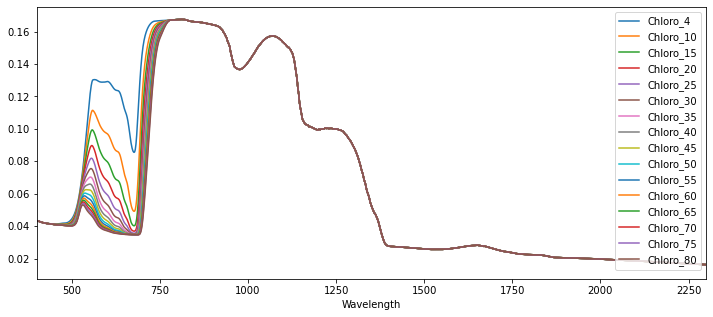

In [3]:
fig, ax = plt.subplots(figsize=(12,5))

df_cab.plot.line(x='Wavelength', y=['Chloro_4', 
       'Chloro_10', 
       'Chloro_15',
       'Chloro_20', 
       'Chloro_25', 
       'Chloro_30',
       'Chloro_35',
       'Chloro_40', 
       'Chloro_45',
       'Chloro_50', 
       'Chloro_55', 
       'Chloro_60', 
       'Chloro_65', 
       'Chloro_70', 
       'Chloro_75', 
       'Chloro_80'], ax=ax)
ax.set_xlim(400,2300)
plt.show()

<div class="alert alert-block alert-danger">
    Exercise 1: describe the changes in the spectra.
    
- Describe the effect of changing each biochemical compound on the simulated spectra.
- Describe the Wavelength range that is affected by each biochemical compound.
- Finally, describe ***why*** this happens
</div>  

Your answer goes here:



.

Above you had a look only at the dataset with changing Chlorophyll values. Repeat the process for the remaining datasets:
`prospectSimulatedSpectra_Car.csv`, `prospectSimulatedSpectra_DMC.csv`, and `prospectSimulatedSpectra_EWT.csv`

Plot these spectra and answer the questions.
Add as many cells below as needed.

In [4]:
# load and plot the next dataset.



***

## Load measured spectra

We will use measured spectra from previous years to compare with the simulated spectra. These measurements come from the work that Jackson Taylor (former ANU student) collected at the National Arboretum as part of his honours project.

We'll now load the measured spectra, plot it, and compare it with the simulated spectra. 

In the `measured` folder, there are several spectra you can use. Plot more spectra if you desire.

In [5]:
# Lets read the first file and see what it looks like
# remember to change the names of the files you're using.

measured_spectra1 = pd.read_csv('measured/MAC_ARB_098_334_210602_L00004.asd.txt',
                                      sep='\t',)

measured_spectra2 = pd.read_csv('measured/MCL_ARB_055_234_210422_L00002.asd.txt',
                               sep='\t')

measured_spectra3 = pd.read_csv('measured/TRI_ARB_099_264_210422_L00003.asd.txt',
                               sep='\t')

measured_spectra1.set_index('Wavelength', inplace=True)
measured_spectra2.set_index('Wavelength', inplace=True)
measured_spectra3.set_index('Wavelength', inplace=True)

measured_spectra1.head()

,MAC_ARB_098_334_210602_L00004.asd
Wavelength,
350,0.020072
351,-0.407955
352,-0.427037
353,0.085457
354,0.180162


Text(0.5, 1.0, 'Measured leaf spectra using a field spectroradiometer')

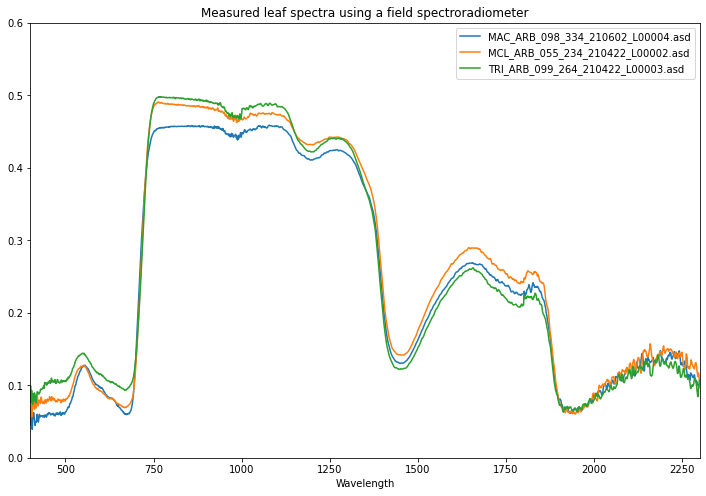

In [6]:
fig, ax = plt.subplots(figsize = (12,8))
measured_spectra1.plot.line(ax=ax)
measured_spectra2.plot.line(ax=ax)
measured_spectra3.plot.line(ax=ax)

ax.set_xlim(400,2300)
ax.set_ylim(0,0.6)
plt.title('Measured leaf spectra using a field spectroradiometer')

<div class="alert alert-block alert-danger">
    Exercise 2: compare the simulated spectra with the real spectra
    
- Describe the main differences between the measured and the simulated spectra.
- Where do the spectra differ the most? What do you think the main causes of discrepancy between the two?

</div>  

In [7]:
# Plot the simulated and the measured spectra



## References

Jacquemoud, S., and Ustin, S. (2019). Leaf optical properties. Cambridge University Press.

Feret, J.B., Francois, C., Asner, G.P., Gitelson, A.A., Martin, R.E., Bidel, L.P.R., Ustin, S.L., le Maire, G., Jacquemoud, S. (2008), PROSPECT-4 and 5: Advances in the leaf optical properties model separating photosynthetic pigments. Remote Sens. Environ. 112, 3030-3043.

Gao, B. (1996), NDWI—A normalized difference water index for remote sensing of vegetation liquid water from space, Remote Sensing of Environment, Volume 58, Issue 3, https://doi.org/10.1016/S0034-4257(96)00067-3

Allen W.A., Gausman H.W., Richardson A.J., Thomas J.R. (1969), Interaction of isotropic ligth with a compact plant leaf, Journal of the Optical Society of American, 59:1376-1379.

Stokes G.G. (1862), On the intensity of the light reflected from or transmitted through a pile of plates, Proceedings of the Royal Society of London, 11:545-556.

Ritchie, R. J. (2006) ‘Consistent sets of spectrophotometric chlorophyll equations for acetone, methanol and ethanol solvents’, Photosynthesis Research, 89(1), pp. 27–41. doi: 10.1007/s11120-006-9065-9.

Sumanta, N. et al. (2014) ‘Spectrophotometric Analysis of Chlorophylls and Carotenoids from Commonly Grown Fern Species by Using Various Extracting Solvents’, Research Journal of Chemical Sciences Res. J. Chem. Sci, 4(9), pp. 2231–606.


***
## Additional information

**License:** The code in this notebook was modified by Nicolas Younes.
The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 

**Contact:** If you need assistance, please post a question on the ENGN3903 Wattle site 

**Last modified:** October 2022